In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))

from data_load import load_data
from data_load import describe_dataset
from eda import convert_to_datetime
from eda import clean_features_data
from eda import calculate_and_save_statistics


In [15]:
# Load datasets
sales_df = load_data(r'C:\Users\007ri\Product_EDA/data/sales data-set.csv')
stores_df = load_data(r'C:\Users\007ri\Product_EDA/data/stores data-set.csv')
features_df = load_data(r'C:\Users\007ri\Product_EDA/data/Features data set.csv')

# display 1st few rows
sales_df.head(), stores_df.head(), features_df.head()


Successfully loaded data from C:\Users\007ri\Product_EDA/data/sales data-set.csv
Successfully loaded data from C:\Users\007ri\Product_EDA/data/stores data-set.csv
Successfully loaded data from C:\Users\007ri\Product_EDA/data/Features data set.csv


(   Store  Dept        Date  Weekly_Sales  IsHoliday
 0      1     1  05/02/2010      24924.50      False
 1      1     1  12/02/2010      46039.49       True
 2      1     1  19/02/2010      41595.55      False
 3      1     1  26/02/2010      19403.54      False
 4      1     1  05/03/2010      21827.90      False,
    Store Type    Size
 0      1    A  151315
 1      2    A  202307
 2      3    B   37392
 3      4    A  205863
 4      5    B   34875,
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
 0      1  05/02/2010        42.31       2.572        NaN        NaN   
 1      1  12/02/2010        38.51       2.548        NaN        NaN   
 2      1  19/02/2010        39.93       2.514        NaN        NaN   
 3      1  26/02/2010        46.63       2.561        NaN        NaN   
 4      1  05/03/2010        46.50       2.625        NaN        NaN   
 
    MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
 0        NaN        NaN        N

In [3]:
 # Save dataset info to a text file
with open(r"C:\Users\007ri\Product_EDA/reports/datasets_info.txt", "w", encoding="utf-8") as file:
    describe_dataset(sales_df, "Sales Data", file)
    describe_dataset(stores_df, "Stores Data", file)
    describe_dataset(features_df, "Features Data", file)

print("Dataset info saved to 'dataset_summary.txt'")

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

In [16]:
def missing_values(df,name):
    missing_values = df.isnull().sum()
    print(f"Columns with Missing Values in {name}\n", missing_values[missing_values > 0])

missing_values(sales_df,"sales")
missing_values(features_df,"feature")
missing_values(stores_df,"stores")

Columns with Missing Values in sales
 Series([], dtype: int64)
Columns with Missing Values in feature
 MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64
Columns with Missing Values in stores
 Series([], dtype: int64)


In [17]:
# Select Markdown columns
missing_value_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5","CPI","Unemployment"]

# Check missing percentage
column_missing = features_df[missing_value_cols].isnull().mean() * 100
print("\nPercentage of Missing Values in Columns:\n", column_missing)

# Check the distribution (to see if 0 makes sense)
print("\nSummary Statistics of missing value Columns:\n", features_df[missing_value_cols].describe())



Percentage of Missing Values in Columns:
 MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
dtype: float64

Summary Statistics of missing value Columns:
            MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
std      9262.747448    8793.583016   11276.462208   6792.329861   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000      36.260000   1176.425000   
75%      8923.310000    2153.350000     163.150000   3310.007500   
max    103184.980000  104519.540000  149483.310000  67474.850000   

           MarkDown5          CPI  Unemployment  
count    4050.000000  7605.000000   7605.000000  


In [18]:
# Convert 'Date' columns to datetime format
sales_df["Date"] = convert_to_datetime(sales_df)
features_df["Date"] = convert_to_datetime(features_df)

# Fill Markdown columns missing values with 0 and CPI & Unemployment missing values using forward fill
features_df = clean_features_data(features_df)

# Check for missing values
print(sales_df.isnull().sum())
print(features_df.isnull().sum())
print(stores_df.isnull().sum())


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64


In [4]:
# Calculate mean, median, and standard deviation for numeric columns of a DataFrame and save it to a text file
with open(r"C:\Users\007ri\Product_EDA/reports/summary_statistics.txt", "w", encoding="utf-8") as file:

    calculate_and_save_statistics(sales_df, "Sales Data", file)
    calculate_and_save_statistics(stores_df, "Stores Data", file)
    calculate_and_save_statistics(features_df, "Features Data", file)

print("Statistics summary saved to file")


Statistics summary saved to file


In [19]:
# Merge sales with store details
merged_df = sales_df.merge(stores_df, on="Store", how="left")

# Merge with features dataset
merged_df = merged_df.merge(features_df, on=["Store", "Date","IsHoliday"], how="left")

# Display the merged data structure
print(merged_df.info())

# Merged dataset is written into a file for generating Power BI reports
merged_df.to_csv(r"C:\Users\007ri\Product_EDA/data/processed_merged_dataset.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [12]:
# Summary statistics
print("Summary Statistics:\n", merged_df.describe())

# Sales Summary by Store Type
print("\nSales Summary by Store Type:\n", merged_df.groupby("Type")["Weekly_Sales"].agg(["mean", "median", "std"]))

# Sales Summary by Holiday
print("\nSales Summary by Holiday:\n", merged_df.groupby("IsHoliday")["Weekly_Sales"].agg(["mean", "median", "std"]))

# Sales Summary by Store number
print("\nSales Summary by Store:\n", merged_df.groupby("Store")["Weekly_Sales"].agg(["mean", "median", "std"]))


Summary Statistics:
                Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%

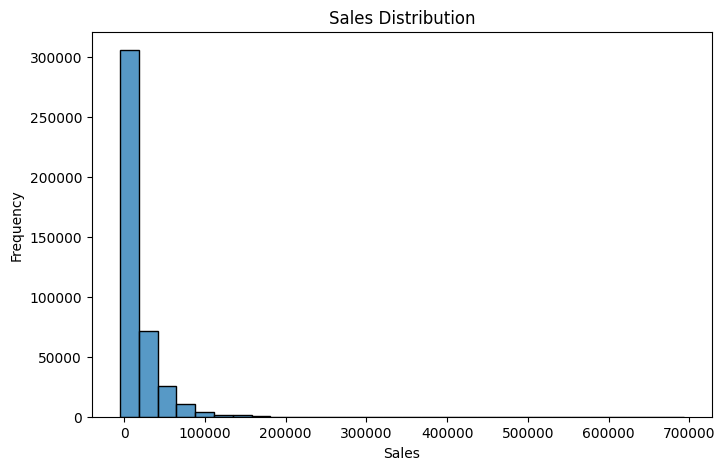

In [29]:
# to plot Histogram (Distribution of Sales)

plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Weekly_Sales'], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

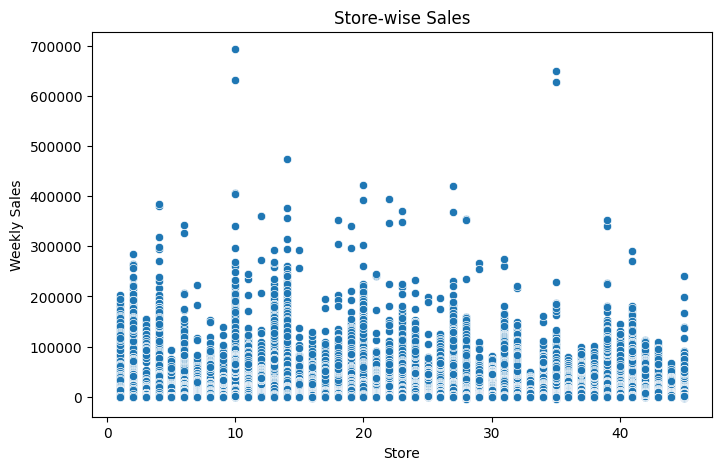

In [24]:
#plot to show Scatter Plot (Sales vs Store)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df["Store"], y=merged_df["Weekly_Sales"])
plt.title("Store-wise Sales")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.show()

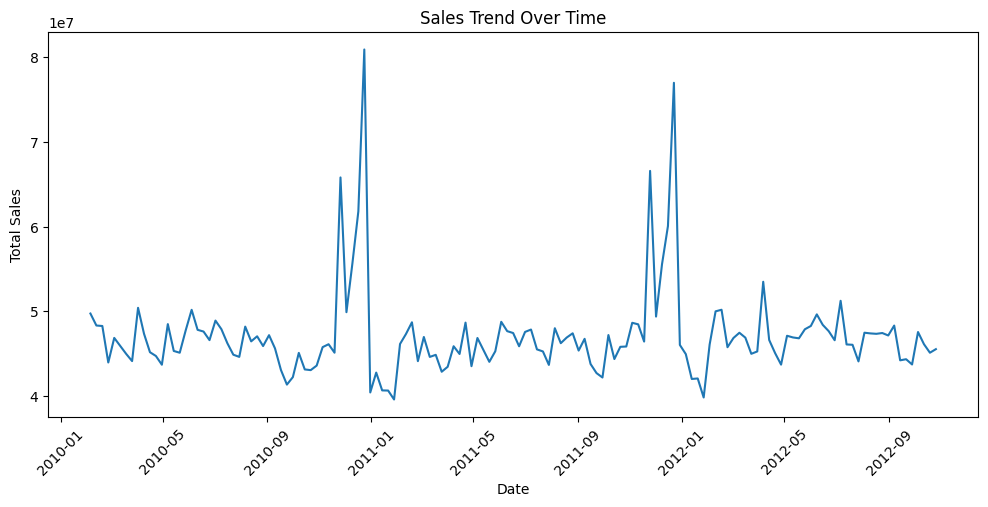

In [25]:
# plot to show Line Chart (Sales Over Time)
df_sorted = merged_df.groupby("Date")["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=df_sorted["Date"], y=df_sorted["Weekly_Sales"])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()